In [3]:
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)

In [4]:
import warnings
warnings.simplefilter('ignore')

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
PATH = "../data"
os.listdir(PATH)

['player_price.csv', 'player_stats.csv']

In [7]:
df_pp = pd.read_csv(PATH+'/player_price.csv')
df_ps = pd.read_csv(PATH+'/player_stats.csv')

In [8]:
#Preprocess TimeStamps
df_pp['timestamp'] = pd.to_datetime(df_pp['timestamp'], unit='ms')
df_pp['year'] = df_pp['timestamp'].apply(lambda x: x.year)
df_pp['month'] = df_pp['timestamp'].apply(lambda x: x.month)
df_pp['day'] = df_pp['timestamp'].apply(lambda x: x.day)

In [9]:
df_pp.head()

,timestamp,ps_price,xbox_price,player_id,player_name,year,month,day
0,2016-09-23,0,0,1,Pelé,2016,9,23
1,2016-09-24,0,10000000,1,Pelé,2016,9,24
2,2016-09-25,0,0,1,Pelé,2016,9,25
3,2016-09-26,0,0,1,Pelé,2016,9,26
4,2016-09-27,0,10000000,1,Pelé,2016,9,27


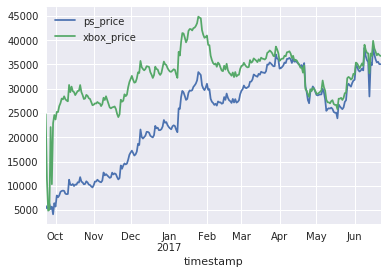

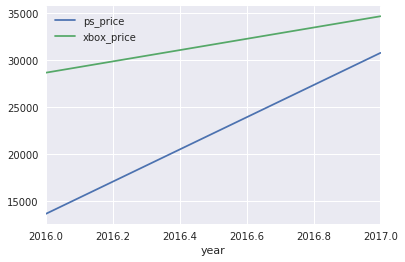

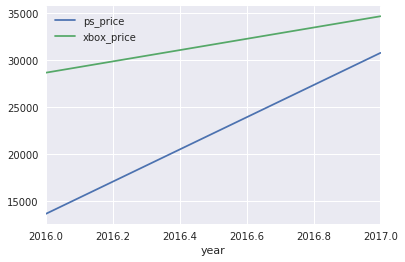

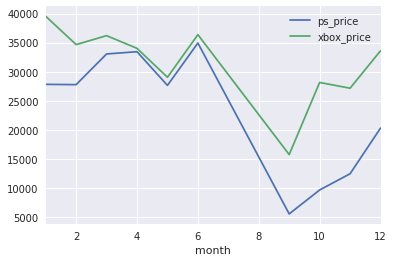

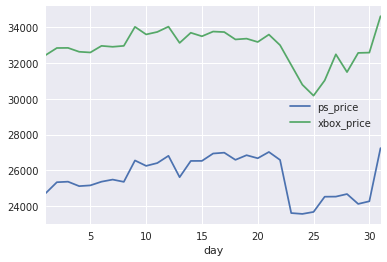

In [10]:
df_pp[['timestamp','ps_price','xbox_price']].groupby(['timestamp']).mean().plot()
df_pp[['year','ps_price','xbox_price']].groupby(['year']).mean().plot()
df_pp[['year','ps_price','xbox_price']].groupby(['year']).mean().plot()
df_pp[['month','ps_price','xbox_price']].groupby(['month']).mean().plot()
df_pp[['day','ps_price','xbox_price']].groupby(['day']).mean().plot()

In [11]:
df_pp.player_name.unique()

array(['Pelé', 'Beckenbauer', 'Maldini', ..., 'Barella', 'Pisacane',
       'Colombo'], dtype=object)

In [12]:
manchester = df_ps[(df_ps.revision=="Normal")&(df_ps.club=="Manchester Utd")]

In [13]:
print(manchester.shape)
print(df_pp['timestamp'].unique().shape)
print(38*273)

(38, 78)
(273,)
10374


In [14]:
df_man = pd.merge(left=manchester, right=df_pp, how='inner', on='player_id')


In [15]:
df_man['timestamp'] = pd.to_datetime(df_man['timestamp'], unit='ms')

In [16]:
df_man

,acceleration,aggression,agility,balance,ball,composure,crossing,curve,defending,diving,...,overall_score,position,rareness,timestamp,ps_price,xbox_price,player_name,year,month,day
0,69,84,86,41,90,91,76,80,31,0,...,90,ST,rare,2016-09-23,678571,518333,Ibrahimovic,2016,9,23
1,69,84,86,41,90,91,76,80,31,0,...,90,ST,rare,2016-09-24,765435,526545,Ibrahimovic,2016,9,24
2,69,84,86,41,90,91,76,80,31,0,...,90,ST,rare,2016-09-25,914462,518970,Ibrahimovic,2016,9,25
3,69,84,86,41,90,91,76,80,31,0,...,90,ST,rare,2016-09-26,578652,508212,Ibrahimovic,2016,9,26
4,69,84,86,41,90,91,76,80,31,0,...,90,ST,rare,2016-09-27,513110,527600,Ibrahimovic,2016,9,27
5,69,84,86,41,90,91,76,80,31,0,...,90,ST,rare,2016-09-28,474354,533447,Ibrahimovic,2016,9,28
6,69,84,86,41,90,91,76,80,31,0,...,90,ST,rare,2016-09-29,402287,506844,Ibrahimovic,2016,9,29
7,69,84,86,41,90,91,76,80,31,0,...,90,ST,rare,2016-09-30,423871,477745,Ibrahimovic,2016,9,30
8,69,84,86,41,90,91,76,80,31,0,...,90,ST,rare,2016-10-01,480216,495055,Ibrahimovic,2016,10,1
9,69,84,86,41,90,91,76,80,31,0,...,90,ST,rare,2016-10-02,501152,526375,Ibrahimovic,2016,10,2


In [17]:
df_man.player_name.unique()

array(['Ibrahimovic', 'De Gea', 'Pogba', 'Mkhitaryan', 'Rooney',
       'Juan Mata', 'Smalling', 'Schweinsteiger', 'Ander Herrera',
       'Schneiderlin', 'Martial', 'Bailly', 'Valencia', 'Carrick', 'Blind',
       'Darmian', 'Depay', 'Shaw', 'Young', 'Romero', 'Jones', 'Fellaini',
       'Rojo', 'Rashford', 'Lingard', 'Fosu-Mensah', 'Wilson', 'Johnstone',
       'Joel Pereira', 'Tuanzebe', 'Riley', 'Poole', 'Goss'], dtype=object)

In [18]:
#We will make forecasting for player Rooney from Manchester United

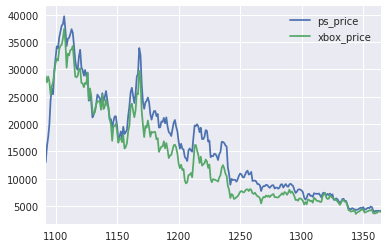

In [19]:
df_man[(df_man.player_name=="Rooney")][['timestamp','ps_price','xbox_price']].plot()

In [20]:
df_man.keys()

Index(['acceleration', 'aggression', 'agility', 'balance', 'ball', 'composure',
       'crossing', 'curve', 'defending', 'diving', 'dribbling', 'finishing',
       'fk', 'handling', 'heading', 'interceptions', 'jumping', 'kicking',
       'long', 'marking', 'pace', 'passing', 'penalties', 'physicality',
       'player_id', 'positioning', 'raits', 'reactions', 'reflexes',
       'shooting', 'short', 'shot', 'sliding', 'specialities', 'speed',
       'sprint', 'stamina', 'standing', 'strength', 'vision', 'volleys', 'cam',
       'cb', 'cdm', 'cf', 'cm', 'lb', 'lf', 'lm', 'lw', 'lwb', 'rb', 'rf',
       'rm', 'rw', 'rwb', 'st', 'added_on', 'age', 'att_workrate', 'club',
       'def_workrate', 'foot', 'height', 'intl_reputation', 'league', 'name',
       'nation', 'origin', 'revision', 'skills', 'weak_foot', 'weight',
       'colour', 'front_scores', 'overall_score', 'position', 'rareness',
       'timestamp', 'ps_price', 'xbox_price', 'player_name', 'year', 'month',
       'day'],
      d

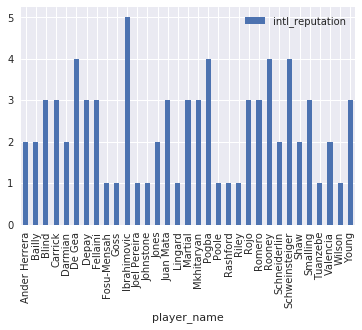

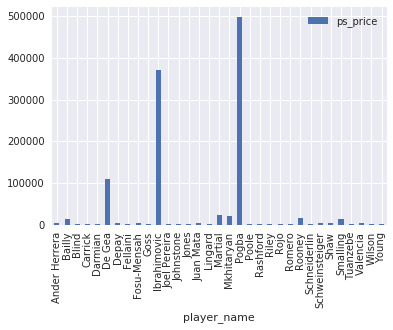

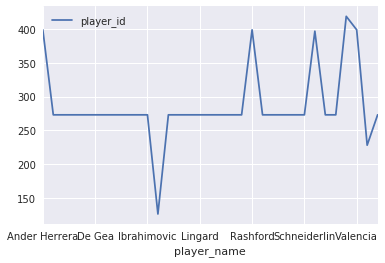

In [21]:
df_man[['intl_reputation','player_name']].groupby('player_name').mean().plot(kind='bar')
df_man[['ps_price','player_name']].groupby('player_name').mean().plot(kind='bar')
df_man[['player_id','player_name']].groupby('player_name').count().plot()

In [22]:
df_rooney = df_man[(df_man.player_name=="Rooney")][['timestamp','ps_price','xbox_price','player_id','colour']]

In [23]:
df_rooney['player_id'].unique()
df_rooney['colour'].unique()

array(['gold'], dtype=object)

In [25]:
rooney_series = df_rooney[['timestamp','xbox_price']].set_index('timestamp')

In [29]:
def plotMovingAverage(series, n):

    """
    series - dataframe with timeseries
    n - rolling window size 

    """

    rolling_mean = series.rolling(window=n).mean()

    # При желании, можно строить и доверительные интервалы для сглаженных значений
    #rolling_std =  series.rolling(window=n).std()
    #upper_bond = rolling_mean+1.96*rolling_std
    #lower_bond = rolling_mean-1.96*rolling_std

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(n))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    #plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
    #plt.plot(lower_bond, "r--")
    plt.plot(series[n:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)   

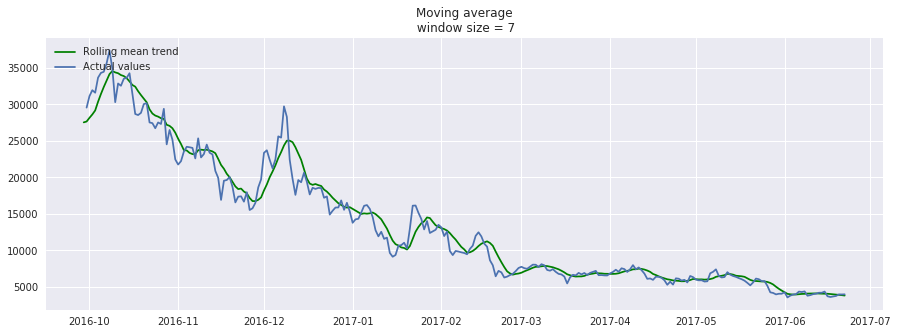

In [30]:
plotMovingAverage(rooney_series, 7)

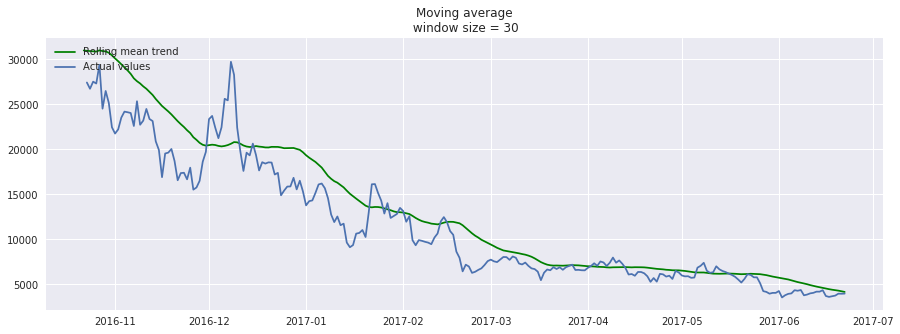

In [33]:
plotMovingAverage(rooney_series, 30)

In [ ]:
def weighted_mean(series,n):
    weight